# Working with Customer Purchases Data

In [1]:
pip install ipykernel -U --user --force-reinstall -quiet

Note: you may need to restart the kernel to use updated packages.



Usage:   
  c:\Users\CAPACITI-JHB\AppData\Local\Programs\Python\Python313\python.exe -m pip install [options] <requirement specifier> [package-index-options] ...
  c:\Users\CAPACITI-JHB\AppData\Local\Programs\Python\Python313\python.exe -m pip install [options] -r <requirements file> [package-index-options] ...
  c:\Users\CAPACITI-JHB\AppData\Local\Programs\Python\Python313\python.exe -m pip install [options] [-e] <vcs project url> ...
  c:\Users\CAPACITI-JHB\AppData\Local\Programs\Python\Python313\python.exe -m pip install [options] [-e] <local project path> ...
  c:\Users\CAPACITI-JHB\AppData\Local\Programs\Python\Python313\python.exe -m pip install [options] <archive url/path> ...

no such option: -u


In [2]:
pip install pandas numpy scikit-learn --quiet

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install matplotlib --quiet

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import KNNImputer, SimpleImputer, IterativeImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split



### 0. Understanding the Data

In [5]:
#data = pd.read_csv('https://raw.githubusercontent.com/Impact-Insights/Data-Engineering-Projects/refs/heads/main/Customer%20Purchases%20Project/Customer_Purchase_Data.csv?token=GHSAT0AAAAAAC7OUMXNMPAYM6LJAYMB27XKZ6HAD7A')
data = pd.read_csv(r'Customer_Purchase_Data.csv')
data.head()

,Unnamed: 0,Customer_ID,Age,Salary,City,Gender,Purchase_Amount,Signup_Date,Marital_Status,Education
0,0,1,40.0,70000.0,New York,NaN,619,2022-01-01,Widowed,PhD
1,1,2,45.0,30000.0,Houston,Female,1945,2022-01-02,Single,PhD
2,2,3,35.0,30000.0,New York,Male,2783,2022-01-03,NaN,Master
3,3,4,45.0,30000.0,NaN,Other,3913,2022-01-04,Married,Bachelor
4,4,5,45.0,30000.0,New York,Male,4771,2022-01-05,Married,NaN


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       105 non-null    int64  
 1   Customer_ID      105 non-null    int64  
 2   Age              88 non-null     float64
 3   Salary           90 non-null     float64
 4   City             90 non-null     object 
 5   Gender           74 non-null     object 
 6   Purchase_Amount  105 non-null    int64  
 7   Signup_Date      105 non-null    object 
 8   Marital_Status   84 non-null     object 
 9   Education        76 non-null     object 
dtypes: float64(2), int64(3), object(5)
memory usage: 8.3+ KB


In [7]:
data = data.drop(columns = ['Unnamed: 0'])
data.head()

,Customer_ID,Age,Salary,City,Gender,Purchase_Amount,Signup_Date,Marital_Status,Education
0,1,40.0,70000.0,New York,NaN,619,2022-01-01,Widowed,PhD
1,2,45.0,30000.0,Houston,Female,1945,2022-01-02,Single,PhD
2,3,35.0,30000.0,New York,Male,2783,2022-01-03,NaN,Master
3,4,45.0,30000.0,NaN,Other,3913,2022-01-04,Married,Bachelor
4,5,45.0,30000.0,New York,Male,4771,2022-01-05,Married,NaN


In [8]:
data.describe()

,Customer_ID,Age,Salary,Purchase_Amount
count,105.000000,88.000000,90.000000,105.000000
mean,48.238095,36.420455,58500.000000,2685.571429
std,30.076672,6.820728,101578.690369,1450.074513
min,1.000000,25.000000,-5000.000000,54.000000
25%,22.000000,30.000000,30000.000000,1419.000000
50%,48.000000,40.000000,50000.000000,2794.000000
75%,74.000000,40.000000,60000.000000,3913.000000
max,100.000000,45.000000,1000000.000000,4983.000000


### 1. Handling Missing Values

1. Handling Missing Data
* Identify all columns with missing values in the dataset. Suggest and implement two different techniques to handle missing values for each of these columns. Compare the effects of each technique.


In the `Age` column we have 17 missing values.
* Mean Imputation: We can handle this by filling the NaN values with the mean of the `Age` column
* We can handle this by using forward fill or backward fill
* Mode Imputation: We can handle this by filling the NaN values with the mode of the `Age` column
* Median Imputation: Replace missing values with the median of the existing values.
* K-Nearest Neighbors (KNN) Imputation: Impute missing values based on the average (for numeric) or mode (for categorical) of the k most similar data points.

The most convenient method is to fill using the KNN. Why?

In the `Salary` column we have 15 missing values.
* Since this is numerical data, we can use the same imputation methods as in the `Age` column.
The most convenient will be to use the Mean Imputation method.

In the `City` column we have 15 missing values.
* The method that is suitable in this case is the Mode Imputation because we are working with Categorical Data.
* Using classifier algorithms

In the `Gender` column we have 31 missing values.
* Just as this is Categorical data, we most convenient method is to use Mode Imputation.

In the `Marital Status` column we have 21 missing values.
* Just as this is Categorical data, we most convenient method is to use Mode Imputation.

In the `Education` column we have 21 missing values.
* Just as this is Categorical data, we most convenient method is to use Mode Imputation.


#### Handling Numerical Missing values using the mean.

In [9]:
print("The Age Mean value of the original data is: ", round(data['Age'].mean(), 2))
print("The Salary mean value of the original data is: ", round(data['Salary'].mean(), 2))

The Age Mean value of the original data is:  36.42
The Salary mean value of the original data is:  58500.0


In [10]:
#Numerical Data
data_mean_imputed = data.copy(deep=True)


data_mean_imputed.loc[:,'Age'] = data_mean_imputed.loc[:, 'Age'].fillna(data_mean_imputed['Age'].mean())
data_mean_imputed.loc[:, 'Salary'] = data_mean_imputed.loc[:, 'Salary'].fillna(data_mean_imputed['Salary'].mean())

#Checking the Mean Difference
print("The Age Mean value of the mean imputed data is: ", round(data_mean_imputed['Age'].mean(), 2))
print("The Salary mean value of the mean imputed data is: ", round(data_mean_imputed['Salary'].mean(), 2))

The Age Mean value of the mean imputed data is:  36.42
The Salary mean value of the mean imputed data is:  58500.0


In [11]:
data_mean_imputed.isna().sum()

Customer_ID         0
Age                 0
Salary              0
City               15
Gender             31
Purchase_Amount     0
Signup_Date         0
Marital_Status     21
Education          29
dtype: int64

#### Handling Numerical missing values using the KNN Imputer.

In [12]:
data_mean_knn_imputed = data.copy(deep=True)
knnImputer = KNNImputer(n_neighbors=3)
data_mean_knn_imputed[['Age', 'Salary', 'Purchase_Amount ']] = knnImputer.fit_transform(data_mean_knn_imputed[['Age', 'Salary', 'Purchase_Amount']])


#data_mean_knn_imputed.iloc[:, ['Age', 'Salary']] = knnImputer.fit_transform(data_mean_knn_imputed[:, ['Age', 'Salary']])
#data_mean_knn_imputed[['Age', 'Salary']] = knnImputer.fit_transform(data_mean_knn_imputed[['Age', 'Salary']])

#data_mean_knn_imputed.iloc[:, ['Age', 'Salary']] = knnImputer.fit_transform(data_mean_knn_imputed[:, ['Age', 'Salary']])


In [13]:
data_mean_knn_imputed.isna().sum()

Customer_ID          0
Age                  0
Salary               0
City                15
Gender              31
Purchase_Amount      0
Signup_Date          0
Marital_Status      21
Education           29
Purchase_Amount      0
dtype: int64

In [14]:
print("The Age Mean value of the KNN imputed data is: ", round(data_mean_knn_imputed['Age'].mean(), 2))
print("The Salary mean value of the KNN imputed data is: ", round(data_mean_knn_imputed['Salary'].mean(), 2))

The Age Mean value of the KNN imputed data is:  36.62
The Salary mean value of the KNN imputed data is:  56619.05


In [15]:
data_mean_knn_imputed.isna().sum()

Customer_ID          0
Age                  0
Salary               0
City                15
Gender              31
Purchase_Amount      0
Signup_Date          0
Marital_Status      21
Education           29
Purchase_Amount      0
dtype: int64

Using the Mean Imputation we get average `Age` as 36.42 and `Salary` as 58500.0.
Using the KNN Imputation we get average `Age` as 36.46 and `Salary` as 57193.65.

We observe a slight difference in the `Age` average comparing the Mean Imputation and the KNN imputation.
We observe a significant difference in the `Salary` average comparing the Mean Imputation and the KNN imputation.


 Mean imputation is simpler and faster but can introduce bias, while KNN imputation is more sophisticated and preserves data relationships better but is computationally more intensive. The best option to use in our case is the KNN Imputer.

#### Handling Categorical missing values Using the Dropping Method


In [16]:
data = data_mean_knn_imputed.copy(deep=True)

In [17]:
data.drop(data.columns[9], axis=1, inplace=True)

In [18]:
data.isna().sum()

Customer_ID         0
Age                 0
Salary              0
City               15
Gender             31
Purchase_Amount     0
Signup_Date         0
Marital_Status     21
Education          29
dtype: int64

In [19]:
#data.dropna(inplace=True)

In [20]:
data

,Customer_ID,Age,Salary,City,Gender,Purchase_Amount,Signup_Date,Marital_Status,Education
0,1,40.0,70000.0,New York,NaN,619,2022-01-01,Widowed,PhD
1,2,45.0,30000.0,Houston,Female,1945,2022-01-02,Single,PhD
2,3,35.0,30000.0,New York,Male,2783,2022-01-03,NaN,Master
3,4,45.0,30000.0,NaN,Other,3913,2022-01-04,Married,Bachelor
4,5,45.0,30000.0,New York,Male,4771,2022-01-05,Married,NaN
...,...,...,...,...,...,...,...,...,...
100,1,40.0,70000.0,New York,NaN,619,2022-01-01,Widowed,PhD
101,2,45.0,30000.0,Houston,Female,1945,2022-01-02,Single,PhD
102,3,35.0,30000.0,New York,Male,2783,2022-01-03,NaN,Master
103,4,45.0,30000.0,NaN,Other,3913,2022-01-04,Married,Bachelor


#### Handling Categorical Missing Values Using the (Multivariate Iterative Chain Equations) MICE Technique

In [21]:
data.columns

Index(['Customer_ID', 'Age', 'Salary', 'City', 'Gender', 'Purchase_Amount',
       'Signup_Date', 'Marital_Status', 'Education'],
      dtype='object')

##### 1. Encoding the Categorical Data First

In [22]:
data_encoder = LabelEncoder()

data['City_Encoded'] = data_encoder.fit_transform(data['City'])
data['Gender_Encoded'] = data_encoder.fit_transform(data['Gender'])
data['Marital_St_Encoded'] = data_encoder.fit_transform(data['Marital_Status'])
data['Edu_Encoded'] = data_encoder.fit_transform(data['Education'])

In [23]:
data.head()

,Customer_ID,Age,Salary,City,Gender,Purchase_Amount,Signup_Date,Marital_Status,Education,City_Encoded,Gender_Encoded,Marital_St_Encoded,Edu_Encoded
0,1,40.0,70000.0,New York,NaN,619,2022-01-01,Widowed,PhD,3,4,3,3
1,2,45.0,30000.0,Houston,Female,1945,2022-01-02,Single,PhD,1,0,2,3
2,3,35.0,30000.0,New York,Male,2783,2022-01-03,NaN,Master,3,1,4,2
3,4,45.0,30000.0,NaN,Other,3913,2022-01-04,Married,Bachelor,6,2,1,0
4,5,45.0,30000.0,New York,Male,4771,2022-01-05,Married,NaN,3,1,1,5


In [24]:
data_train = data.drop(columns= ['City', 'Gender', 'Signup_Date', 'Marital_Status', 'Education'], axis=1).copy(deep=True)
data_train.head()

,Customer_ID,Age,Salary,Purchase_Amount,City_Encoded,Gender_Encoded,Marital_St_Encoded,Edu_Encoded
0,1,40.0,70000.0,619,3,4,3,3
1,2,45.0,30000.0,1945,1,0,2,3
2,3,35.0,30000.0,2783,3,1,4,2
3,4,45.0,30000.0,3913,6,2,1,0
4,5,45.0,30000.0,4771,3,1,1,5


##### Imptuting The Data

In [25]:
imputer = IterativeImputer(random_state=100)

In [26]:
imputer.fit(data_train)

IterativeImputer(random_state=100)

In [27]:
dict(zip(data_encoder.classes_, data_encoder.transform(data_encoder.classes_)))

{'Bachelor': np.int64(0),
 'High School': np.int64(1),
 'Master': np.int64(2),
 'PhD': np.int64(3),
 'bachelor': np.int64(4),
 nan: np.int64(5)}

In [28]:
data_train['Edu_Encoded'] = data_encoder.transform(data_train['Edu_Encoded'])
data_train.head()

ValueError: y contains previously unseen labels: 3

In [ ]:
data_imputed = imputer.fit_transform(data_train)
data_imputed.astype(int)

array([[      1,      40,   70000,     619,       3,       4,       3,
              3],
       [      2,      45,   30000,    1945,       1,       0,       2,
              3],
       [      3,      35,   30000,    2783,       3,       1,       4,
              2],
       [      4,      45,   30000,    3913,       6,       2,       1,
              0],
       [      5,      45,   30000,    4771,       3,       1,       1,
              5],
       [      6,      30, 1000000,    4064,       2,       1,       4,
              5],
       [      7,      35,   50000,    2951,       1,       0,       3,
              2],
       [      8,      35,   50000,    1736,       1,       4,       1,
              3],
       [      9,      35,   30000,    3059,       6,       0,       3,
              1],
       [     10,      45,   50000,     204,       2,       0,       1,
              3],
       [     11,      40,   50000,    2587,       4,       0,       1,
              2],
       [     12,     

In [ ]:
data_imputed[:5:7].astype(int).round()

array([[    1,    40, 70000,   619,     3,     4,     3,     3]])

In [ ]:
data_encoder

In [ ]:
data_imputed = list(data_encoder.inverse_transform(data_imputed.round().reshape(-1,1))) 

c:\Users\CAPACITI-JHB\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\preprocessing\_label.py:151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: y contains previously unseen labels: [-5.0000e+03  6.0000e+00  7.0000e+00  8.0000e+00  9.0000e+00  1.0000e+01
  1.1000e+01  1.2000e+01  1.3000e+01  1.4000e+01  1.5000e+01  1.6000e+01
  1.7000e+01  1.8000e+01  1.9000e+01  2.0000e+01  2.1000e+01  2.2000e+01
  2.3000e+01  2.4000e+01  2.5000e+01  2.6000e+01  2.7000e+01  2.8000e+01
  2.9000e+01  3.0000e+01  3.1000e+01  3.2000e+01  3.3000e+01  3.4000e+01
  3.5000e+01  3.6000e+01  3.7000e+01  3.8000e+01  3.9000e+01  4.0000e+01
  4.1000e+01  4.2000e+01  4.3000e+01  4.4000e+01  4.5000e+01  4.6000e+01
  4.7000e+01  4.8000e+01  4.9000e+01  5.0000e+01  5.1000e+01  5.2000e+01
  5.3000e+01  5.4000e+01  5.5000e+01  5.6000e+01  5.7000e+01  5.8000e+01
  5.9000e+01  6.0000e+01  6.1000e+01  6.2000e+01  6.3000e+01  6.4000e+01
  6.5000e+01  6.6000e+01  6.7000e+01  6.8000e+01  6.9000e+01  7.0000e+01
  7.1000e+01  7.2000e+01  7.3000e+01  7.4000e+01  7.5000e+01  7.6000e+01
  7.7000e+01  7.8000e+01  7.9000e+01  8.0000e+01  8.1000e+01  8.2000e+01
  8.3000e+01  8.4000e+01  8.5000e+01  8.6000e+01  8.7000e+01  8.8000e+01
  8.9000e+01  9.0000e+01  9.1000e+01  9.2000e+01  9.3000e+01  9.4000e+01
  9.5000e+01  9.6000e+01  9.7000e+01  9.8000e+01  9.9000e+01  1.0000e+02
  1.6600e+02  1.6900e+02  2.0400e+02  5.6200e+02  5.7400e+02  5.8700e+02
  6.0900e+02  6.1900e+02  6.2400e+02  6.3000e+02  6.8500e+02  7.9000e+02
  8.3400e+02  8.8000e+02  9.0300e+02  9.2600e+02  1.0210e+03  1.0410e+03
  1.0620e+03  1.1310e+03  1.1980e+03  1.2000e+03  1.2160e+03  1.2930e+03
  1.4190e+03  1.4590e+03  1.5200e+03  1.7140e+03  1.7290e+03  1.7320e+03
  1.7360e+03  1.7430e+03  1.7650e+03  1.8910e+03  1.9450e+03  1.9810e+03
  2.0320e+03  2.1910e+03  2.3150e+03  2.3440e+03  2.4180e+03  2.5050e+03
  2.5290e+03  2.5410e+03  2.5870e+03  2.7100e+03  2.7510e+03  2.7830e+03
  2.7940e+03  2.8240e+03  2.8560e+03  2.8880e+03  2.8990e+03  2.9510e+03
  3.0000e+03  3.0090e+03  3.0590e+03  3.1010e+03  3.1090e+03  3.1680e+03
  3.1740e+03  3.1970e+03  3.2250e+03  3.3110e+03  3.3930e+03  3.4060e+03
  3.5560e+03  3.7220e+03  3.7250e+03  3.7860e+03  3.8190e+03  3.8970e+03
  3.9040e+03  3.9130e+03  4.0640e+03  4.0950e+03  4.1070e+03  4.1200e+03
  4.1650e+03  4.1810e+03  4.1920e+03  4.1960e+03  4.2990e+03  4.3910e+03
  4.4140e+03  4.5150e+03  4.5450e+03  4.5980e+03  4.6330e+03  4.6960e+03
  4.7710e+03  4.7790e+03  4.8020e+03  4.8270e+03  4.8300e+03  4.8490e+03
  4.9190e+03  4.9790e+03  4.9830e+03  3.0000e+04  4.0000e+04  5.0000e+04
  5.8478e+04  5.8483e+04  5.8490e+04  5.8492e+04  5.8497e+04  5.8501e+04
  5.8502e+04  5.8504e+04  5.8506e+04  5.8510e+04  5.8513e+04  5.8517e+04
  5.8518e+04  6.0000e+04  7.0000e+04  1.0000e+06]

In [ ]:
# Encode categorical variables
label_encoder = LabelEncoder()

# Encode the 'City' column
city_column = data['City']
city_column_encoded = label_encoder.fit_transform(city_column.astype(str)).reshape(-1, 1)

# Apply KNN Imputer
knn_imputer = KNNImputer(n_neighbors=2)
imputed_city_column = knn_imputer.fit_transform(city_column_encoded)

# Decode categorical variables
# Ensure the imputed values are within the range of the fitted label encoder
imputed_city_column = np.clip(imputed_city_column.round().astype(int), 0, len(label_encoder.classes_) - 1)
imputed_city_column_decoded = label_encoder.inverse_transform(imputed_city_column.flatten())

# Update the original data with the imputed values
data['City'] = imputed_city_column_decoded

#### Handling Categorical missing values Using the KNN Imputer

For us to be able to use KNN Imputation on categorical data we have to first encode the data, use KNN Imputation and decode the data back to their categories.

In [ ]:
data['City'].unique()

array(['New York', 'Houston', nan, 'Los Angeles', 'New-York', 'Phoenix',
       'Chicago'], dtype=object)

In [ ]:
data['City'] = data['City'].replace('nan', np.nan)

In [ ]:
data['City'].unique()


array(['New York', 'Houston', nan, 'Los Angeles', 'New-York', 'Phoenix',
       'Chicago'], dtype=object)

In [ ]:
# Encode categorical variables
label_encoder = LabelEncoder()

# Encode the 'City' column
city_column = data['City']
city_column_encoded = label_encoder.fit_transform(city_column.astype(str)).reshape(-1, 1)

# Apply KNN Imputer
knn_imputer = KNNImputer(n_neighbors=2)
imputed_city_column = knn_imputer.fit_transform(city_column_encoded)

# Decode categorical variables
imputed_city_column_decoded = label_encoder.inverse_transform(imputed_city_column.round().astype(int).flatten())

# Update the original data with the imputed values
data['City'] = imputed_city_column_decoded

In [ ]:
data['City'].unique()

array(['New York', 'Houston', 'nan', 'Los Angeles', 'New-York', 'Phoenix',
       'Chicago'], dtype=object)

##### Using SimpleImputer from sklearn.

In [ ]:

label_encoder = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
label_encoder = SimpleImputer(missing_values='nan', strategy='most_frequent')


city_simp_imp = data['City'].copy(deep=True)

#data['City_Simp_Imp'] = label_encoder.fit_transform(data.loc[:, 'City'].values.reshape(-1, 1)) 

label_encoder.fit_transform(city_simp_imp.values.reshape(-1, 1))

array([['New York'],
       ['Houston'],
       ['New York'],
       ['New York'],
       ['New York'],
       ['Los Angeles'],
       ['Houston'],
       ['Houston'],
       ['New York'],
       ['Los Angeles'],
       ['New-York'],
       ['New York'],
       ['Phoenix'],
       ['New York'],
       ['New York'],
       ['Chicago'],
       ['New York'],
       ['Los Angeles'],
       ['Los Angeles'],
       ['Houston'],
       ['New York'],
       ['Phoenix'],
       ['New York'],
       ['New York'],
       ['Chicago'],
       ['New York'],
       ['Los Angeles'],
       ['Phoenix'],
       ['Houston'],
       ['Los Angeles'],
       ['New York'],
       ['Houston'],
       ['Chicago'],
       ['Chicago'],
       ['New York'],
       ['New York'],
       ['Phoenix'],
       ['Houston'],
       ['Los Angeles'],
       ['New York'],
       ['New York'],
       ['Chicago'],
       ['New York'],
       ['New York'],
       ['Houston'],
       ['Chicago'],
       ['New York'],
       ['P

In [ ]:
city_simp_imp[city_simp_imp]

np.int64(0)

In [ ]:
data = data.drop(columns = ['City_Simp_Imp'])

In [ ]:

label_encoder = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

data['City_Simp_Imp'] = data['City'].copy() 

label_encoder.fit_transform(data['City_Simp_Imp'].values.reshape(-1, 1))


array([['New York'],
       ['Houston'],
       ['New York'],
       ['nan'],
       ['New York'],
       ['Los Angeles'],
       ['Houston'],
       ['Houston'],
       ['nan'],
       ['Los Angeles'],
       ['New-York'],
       ['New York'],
       ['Phoenix'],
       ['New York'],
       ['New York'],
       ['Chicago'],
       ['New York'],
       ['Los Angeles'],
       ['Los Angeles'],
       ['Houston'],
       ['nan'],
       ['Phoenix'],
       ['New York'],
       ['New York'],
       ['Chicago'],
       ['nan'],
       ['Los Angeles'],
       ['Phoenix'],
       ['Houston'],
       ['Los Angeles'],
       ['nan'],
       ['Houston'],
       ['Chicago'],
       ['Chicago'],
       ['New York'],
       ['nan'],
       ['Phoenix'],
       ['Houston'],
       ['Los Angeles'],
       ['nan'],
       ['nan'],
       ['Chicago'],
       ['New York'],
       ['New York'],
       ['Houston'],
       ['Chicago'],
       ['nan'],
       ['Phoenix'],
       ['Chicago'],
       ['Housto

In [ ]:
data['City'].unique()

array(['New York', 'Houston', 'nan', 'Los Angeles', 'New-York', 'Phoenix',
       'Chicago'], dtype=object)

In [ ]:
# Encode categorical variables
label_encoder = LabelEncoder()

# Encode the 'Gender' column
gender_column = data['Gender']
gender_column_encoded = label_encoder.fit_transform(gender_column.astype(str)).reshape(-1, 1)

# Apply KNN Imputer
knn_imputer = KNNImputer(n_neighbors=2)
imputed_gender_column = knn_imputer.fit_transform(gender_column_encoded)

# Decode categorical variables
imputed_gender_column_decoded = label_encoder.inverse_transform(imputed_gender_column.round().astype(int).flatten())

# Update the original data with the imputed values
data['Gender'] = imputed_gender_column_decoded

In [ ]:
data_mean_imputed['Gender'].unique()

array([nan, 'Female', 'Male', 'Other', 'male'], dtype=object)

In [ ]:
data['Gender'].head()

0       nan
1    Female
2      Male
3     Other
4      Male
Name: Gender, dtype: object

In [ ]:
# Encode categorical variables
label_encoder = LabelEncoder()

# Encode the 'Gender' column
marital_status_col = data['Marital_Status']
marital_status_column_encoded = label_encoder.fit_transform(marital_status_col.astype(str)).reshape(-1, 1)

# Apply KNN Imputer
knn_imputer = KNNImputer(n_neighbors=2)
imputed_marital_status_col = knn_imputer.fit_transform(marital_status_column_encoded)

# Decode categorical variables
imputed_marital_status_col_decoded = label_encoder.inverse_transform(imputed_marital_status_col.round().astype(int).flatten())

# Update the original data with the imputed values
data['Marital_Status'] = imputed_marital_status_col_decoded

In [ ]:
data['Marital_Status'].head()

0    Widowed
1     Single
2        nan
3    Married
4    Married
Name: Marital_Status, dtype: object

In [ ]:
# Encode categorical variables
label_encoder = LabelEncoder()

# Encode the 'Gender' column
education_col = data['Education']
education_column_encoded = label_encoder.fit_transform(education_col.astype(str)).reshape(-1, 1)

# Apply KNN Imputer
knn_imputer = KNNImputer(n_neighbors=2)
imputed_education_col = knn_imputer.fit_transform(education_column_encoded)

# Decode categorical variables
education_col_decoded = label_encoder.inverse_transform(imputed_education_col.round().astype(int).flatten())

# Update the original data with the imputed values
data['Education'] = education_col_decoded

In [ ]:
data['Education'].head()    

0         PhD
1         PhD
2      Master
3    Bachelor
4         nan
Name: Education, dtype: object

In [ ]:
data.head()

,Customer_ID,Age,Salary,City,Gender,Purchase_Amount,Signup_Date,Marital_Status,Education,City_Simp_Imp
0,1,40.0,70000.0,New York,nan,619,2022-01-01,Widowed,PhD,New York
1,2,45.0,30000.0,Houston,Female,1945,2022-01-02,Single,PhD,Houston
2,3,35.0,30000.0,New York,Male,2783,2022-01-03,nan,Master,New York
3,4,45.0,30000.0,nan,Other,3913,2022-01-04,Married,Bachelor,nan
4,5,45.0,30000.0,New York,Male,4771,2022-01-05,Married,nan,New York


In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Customer_ID      105 non-null    int64  
 1   Age              105 non-null    float64
 2   Salary           105 non-null    float64
 3   City             105 non-null    object 
 4   Gender           105 non-null    object 
 5   Purchase_Amount  105 non-null    int64  
 6   Signup_Date      105 non-null    object 
 7   Marital_Status   105 non-null    object 
 8   Education        105 non-null    object 
 9   City_Simp_Imp    105 non-null    object 
dtypes: float64(2), int64(2), object(6)
memory usage: 8.3+ KB


In [ ]:
data.isna().sum()

Customer_ID        0
Age                0
Salary             0
City               0
Gender             0
Purchase_Amount    0
Signup_Date        0
Marital_Status     0
Education          0
City_Simp_Imp      0
dtype: int64

In [ ]:
grouped_city = data.groupby('City')['City'].count()
grouped_city

City
Chicago        19
Houston        23
Los Angeles    13
New York       27
New-York        1
Phoenix         7
nan            15
Name: City, dtype: int64

In [ ]:
grouped_gender = data.groupby('Gender')['Gender'].count()
grouped_gender

Gender
Female    21
Male      32
Other     20
male       1
nan       31
Name: Gender, dtype: int64

In [ ]:
grouped_marital_st = data.groupby('Marital_Status')['Marital_Status'].count()
grouped_marital_st

Marital_Status
Divorced    17
Married     22
Single      24
Widowed     21
nan         21
Name: Marital_Status, dtype: int64

In [ ]:
grouped_education = data.groupby('Education')['Education'].count()
grouped_education

Education
Bachelor       18
High School    18
Master         17
PhD            22
bachelor        1
nan            29
Name: Education, dtype: int64

### 2. Categorical Data Standardization
* The `City` and `Gender` columns contain inconsistent values. Write a Python function to detect and correct inconsistencies in these categorical columns, ensuring uniformity.

In [ ]:
data['City'].unique()

array(['New York', 'Houston', 'nan', 'Los Angeles', 'New-York', 'Phoenix',
       'Chicago'], dtype=object)

In [ ]:
data['Gender'].unique()

array(['nan', 'Female', 'Male', 'Other', 'male'], dtype=object)

In [ ]:
data['Gender'] = data['Gender'].replace('male', 'Male')
data['Gender'].unique()

array(['nan', 'Female', 'Male', 'Other'], dtype=object)

### 3. Duplicate Detection and Handling
* Write a Python script to identify duplicate rows in the dataset. What criteria should be used to detect duplicates? Explain why duplicates might appear in real-world data.

1. You can remove duplicated rows using the drop_duplicates method.
2. You can specify whether to keep the first or last occurrence of the duplicated rows.
3. You can remove duplicates based on specific columns.
4. Removing Duplicates Based on Specific Columns.
5. Handling Duplicates with Aggregation. You may want to aggregate the duplicated rows instead of simply removing them
6.  Flagging Duplicates - If you want to flag duplicates instead of removing them, you can add a new column indicating whether a row is duplicated.

Dropping duplicates in this case might be tricky as a customer might appear more than once, buying the same product which costs the same. But a customer cannot have the more than one sign-up date as the first entry must've been recorded. In this case, we can only include the latest sign-up date as it is the final update in the data.

In [ ]:
data[data.columns].duplicated().sum()

np.int64(5)

In [ ]:
data.drop_duplicates(keep='last')


,Customer_ID,Age,Salary,City,Gender,Purchase_Amount,Signup_Date,Marital_Status,Education,City_Simp_Imp
5,6,30.0,1000000.0,Los Angeles,Male,4064,2022-01-06,nan,nan,Los Angeles
6,7,35.0,50000.0,Houston,Female,2951,2022-01-07,Widowed,Master,Houston
7,8,35.0,50000.0,Houston,nan,1736,2022-01-08,Married,PhD,Houston
8,9,35.0,30000.0,nan,Female,3059,2022-01-09,Widowed,High School,nan
9,10,45.0,50000.0,Los Angeles,Female,204,2022-01-10,Married,PhD,Los Angeles
...,...,...,...,...,...,...,...,...,...,...
100,1,40.0,70000.0,New York,nan,619,2022-01-01,Widowed,PhD,New York
101,2,45.0,30000.0,Houston,Female,1945,2022-01-02,Single,PhD,Houston
102,3,35.0,30000.0,New York,Male,2783,2022-01-03,nan,Master,New York
103,4,45.0,30000.0,nan,Other,3913,2022-01-04,Married,Bachelor,nan


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Customer_ID      105 non-null    int64  
 1   Age              105 non-null    float64
 2   Salary           105 non-null    float64
 3   City             105 non-null    object 
 4   Gender           105 non-null    object 
 5   Purchase_Amount  105 non-null    int64  
 6   Signup_Date      105 non-null    object 
 7   Marital_Status   105 non-null    object 
 8   Education        105 non-null    object 
 9   City_Simp_Imp    105 non-null    object 
dtypes: float64(2), int64(2), object(6)
memory usage: 8.3+ KB


In this case we are to not drop the duplicates because of the Customer_ID column as we cannot have more than one instance

In [ ]:
data['Education'] = data['Education'].replace('bachelor', 'Bachelor')
print(data['Education'].unique())


['PhD' 'Master' 'Bachelor' 'nan' 'High School']


### 4.  Outlier Detection and Handling

* Identify the outliers in the `Salary` and `Purchase_Amount` columns using both the Interquartile Range (IQR) Method and Z-score Method. How do the results compare? Propose a suitable strategy for handling these outliers.

Outlier detection and handling can be done using various methods, such as the Z-score method, the IQR method, or using machine learning algorithms.

In [ ]:
# Calculate Z-scores
numerical_data = data[['Age', 'Salary', 'Purchase_Amount']]
z_scores = np.abs(stats.zscore(numerical_data))

# Define a threshold for identifying outliers
threshold = 3

# Identify outliers
outliers = np.where(z_scores > threshold)

# Print outliers
print("Outliers detected using Z-score method:")
print(numerical_data.iloc[outliers[0]])

# Remove outliers
data_cleaned = numerical_data[(z_scores < threshold).all(axis=1)]

print("\nData after removing outliers using Z-score method:")
print(data_cleaned.head())

Outliers detected using Z-score method:
    Age     Salary  Purchase_Amount
5  30.0  1000000.0             4064

Data after removing outliers using Z-score method:
    Age   Salary  Purchase_Amount
0  40.0  70000.0              619
1  45.0  30000.0             1945
2  35.0  30000.0             2783
3  45.0  30000.0             3913
4  45.0  30000.0             4771


In [ ]:
numerical_data = data[['Age', 'Salary', 'Purchase_Amount']]


# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = numerical_data.quantile(0.25)
Q3 = numerical_data.quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Identify outliers
outliers = ((numerical_data < (Q1 - 1.5 * IQR)) | (numerical_data > (Q3 + 1.5 * IQR))).any(axis=1)

# Print outliers
print("Outliers detected using IQR method:")
print(numerical_data[outliers])

# Remove outliers
data_cleaned = numerical_data[~outliers]

print("\nData after removing outliers using IQR method:")
print(data_cleaned.head())

Outliers detected using IQR method:
    Age     Salary  Purchase_Amount
5  30.0  1000000.0             4064

Data after removing outliers using IQR method:
    Age   Salary  Purchase_Amount
0  40.0  70000.0              619
1  45.0  30000.0             1945
2  35.0  30000.0             2783
3  45.0  30000.0             3913
4  45.0  30000.0             4771


### 5. Feature Engineering: Age Groups

* Create a new column, Age_Group, that categorizes customers into age groups: `Young (18-30)`, `Middle-Aged (31-50)`, and `Senior (51 and above)`. Provide a visualization that shows the distribution of customers by age group.

In [ ]:
# Define age bins and labels

bins = [18, 31, 51, 100]
labels = ['Young', 'Middle-Aged', 'Senior']

# Create age groups
data['Age Group'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)

data.head()

,Customer_ID,Age,Salary,City,Gender,Purchase_Amount,Signup_Date,Marital_Status,Education,City_Simp_Imp,Age Group
0,1,40.0,70000.0,New York,nan,619,2022-01-01,Widowed,PhD,New York,Middle-Aged
1,2,45.0,30000.0,Houston,Female,1945,2022-01-02,Single,PhD,Houston,Middle-Aged
2,3,35.0,30000.0,New York,Male,2783,2022-01-03,nan,Master,New York,Middle-Aged
3,4,45.0,30000.0,nan,Other,3913,2022-01-04,Married,Bachelor,nan,Middle-Aged
4,5,45.0,30000.0,New York,Male,4771,2022-01-05,Married,nan,New York,Middle-Aged


### 6. Data Transformation
* Normalize the `Purchase_Amount` column using both Min-Max Scaling and Standardization (Z-score Normalization). Plot histograms before and after transformation to illustrate the effects.


C:\Users\CAPACITI-JHB\AppData\Local\Temp\ipykernel_12264\838772254.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p_data['Purchase_Amount_MinMax'] = min_max_scaler.fit_transform(p_data['Purchase_Amount'].values.reshape(-1, 1))
C:\Users\CAPACITI-JHB\AppData\Local\Temp\ipykernel_12264\838772254.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p_data['Purchase_Amount_Standard'] = standard_scaler.fit_transform(p_data[['Purchase_Amount']])


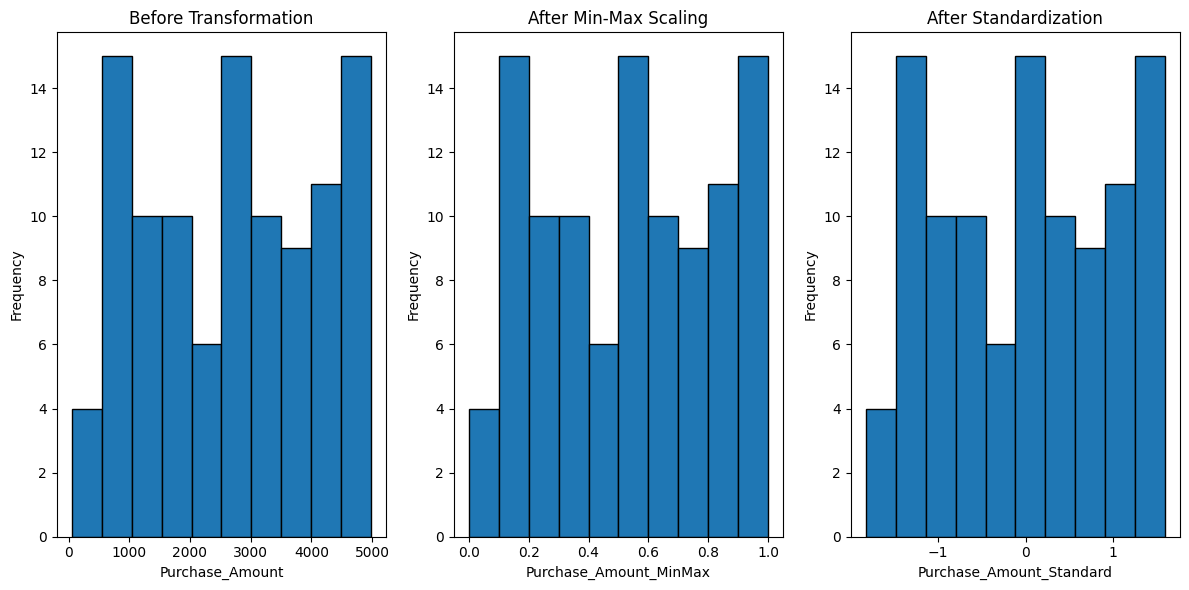

,Customer_ID,Purchase_Amount,Purchase_Amount_MinMax,Purchase_Amount_Standard
0,1,619,0.114628,-1.431984
1,2,1945,0.383648,-0.513162
2,3,2783,0.553662,0.067511
3,4,3913,0.782917,0.850519
4,5,4771,0.956989,1.445050


In [ ]:
# Plot histogram before transformation
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.hist(data['Purchase_Amount'], bins=10, edgecolor='k')
plt.title('Before Transformation')
plt.xlabel('Purchase_Amount')
plt.ylabel('Frequency')

p_data = data[['Customer_ID', 'Purchase_Amount']]
# Min-Max Scaling
min_max_scaler = MinMaxScaler()
p_data['Purchase_Amount_MinMax'] = min_max_scaler.fit_transform(p_data['Purchase_Amount'].values.reshape(-1, 1))

# Plot histogram after Min-Max Scaling
plt.subplot(1, 3, 2)
plt.hist(p_data['Purchase_Amount_MinMax'], bins=10, edgecolor='k')
plt.title('After Min-Max Scaling')
plt.xlabel('Purchase_Amount_MinMax')
plt.ylabel('Frequency')

# Standardization (Z-score Normalization)
standard_scaler = StandardScaler()
p_data['Purchase_Amount_Standard'] = standard_scaler.fit_transform(p_data[['Purchase_Amount']])

# Plot histogram after Standardization
plt.subplot(1, 3, 3)
plt.hist(p_data['Purchase_Amount_Standard'], bins=10, edgecolor='k')
plt.title('After Standardization')
plt.xlabel('Purchase_Amount_Standard')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

p_data.head()

### 7. Encoding Categorical Variables
* Convert all categorical columns into numerical format using three different encoding techniques: One-Hot Encoding, Label Encoding, and Target Encoding. Compare the impact of each method.


In [ ]:
categorical_data = data[['City', 'Gender', 'Marital_Status', 'Education']]

#### 7.1 One-Hot Encoding

In [ ]:
# One-Hot Encoding
data_one_hot = pd.get_dummies(categorical_data, columns=['City'])
data_one_hot.head()

,Gender,Marital_Status,Education,City_Chicago,City_Houston,City_Los Angeles,City_New York,City_New-York,City_Phoenix,City_nan
0,nan,Widowed,PhD,False,False,False,True,False,False,False
1,Female,Single,PhD,False,True,False,False,False,False,False
2,Male,nan,Master,False,False,False,True,False,False,False
3,Other,Married,Bachelor,False,False,False,False,False,False,True
4,Male,Married,nan,False,False,False,True,False,False,False


#### 7.2 Label Encoding 

In [ ]:
# Label Encoding
label_encoder = LabelEncoder()
categorical_data['City_Label'] = label_encoder.fit_transform(categorical_data['City'])
categorical_data.head()

C:\Users\CAPACITI-JHB\AppData\Local\Temp\ipykernel_12264\4202678014.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_data['City_Label'] = label_encoder.fit_transform(categorical_data['City'])


,City,Gender,Marital_Status,Education,City_Label
0,New York,nan,Widowed,PhD,3
1,Houston,Female,Single,PhD,1
2,New York,Male,nan,Master,3
3,nan,Other,Married,Bachelor,6
4,New York,Male,Married,nan,3


#### 7.3 Target Encoding

In [ ]:
target_mean = categorical_data.groupby('City')['City_Label'].mean()

# Map the mean target to the original DataFrame
categorical_data['City_Target'] = categorical_data['City'].map(target_mean)
print(categorical_data)

         City  Gender Marital_Status Education  City_Label  City_Target
0    New York     nan        Widowed       PhD           3          3.0
1     Houston  Female         Single       PhD           1          1.0
2    New York    Male            nan    Master           3          3.0
3         nan   Other        Married  Bachelor           6          6.0
4    New York    Male        Married       nan           3          3.0
..        ...     ...            ...       ...         ...          ...
100  New York     nan        Widowed       PhD           3          3.0
101   Houston  Female         Single       PhD           1          1.0
102  New York    Male            nan    Master           3          3.0
103       nan   Other        Married  Bachelor           6          6.0
104  New York    Male        Married       nan           3          3.0

[105 rows x 6 columns]


C:\Users\CAPACITI-JHB\AppData\Local\Temp\ipykernel_12264\1095168488.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_data['City_Target'] = categorical_data['City'].map(target_mean)


### 8. Data Integrity Check
* Write a function to detect and correct inconsistencies in the `Marital_Status` and `Education` columns. Document the issues you find and justify the correction methods used.


In [ ]:
data.head()

,Customer_ID,Age,Salary,City,Gender,Purchase_Amount,Signup_Date,Marital_Status,Education,City_Simp_Imp,Age Group
0,1,40.0,70000.0,New York,nan,619,2022-01-01,Widowed,PhD,New York,Middle-Aged
1,2,45.0,30000.0,Houston,Female,1945,2022-01-02,Single,PhD,Houston,Middle-Aged
2,3,35.0,30000.0,New York,Male,2783,2022-01-03,nan,Master,New York,Middle-Aged
3,4,45.0,30000.0,nan,Other,3913,2022-01-04,Married,Bachelor,nan,Middle-Aged
4,5,45.0,30000.0,New York,Male,4771,2022-01-05,Married,nan,New York,Middle-Aged


In [ ]:
data['Marital_Status'].unique()

array(['Widowed', 'Single', 'nan', 'Married', 'Divorced'], dtype=object)

In [ ]:
data['Education'].unique()

array(['PhD', 'Master', 'Bachelor', 'nan', 'High School'], dtype=object)

In [ ]:
data['Education'] = data['Education'].replace('Bachelor', 'bachelor')
data['Education'].unique()

array(['PhD', 'Master', 'bachelor', 'nan', 'High School'], dtype=object)

In the `Marital_Status` column we do not have any inconsistencies.

In the `Education` column we have Bachelor and bachelor which are the same but not consistent and that is what we will change to Bachelor to fix the inconsistency.

### 9. Data Splitting

* Split the cleaned dataset into training (70%) and testing (30%) sets while ensuring that the class distributions of categorical variables are preserved. Explain the importance of maintaining the class distribution.



In [ ]:
# Split the dataset into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.3, random_state=42)

print("Training Set:")
train_data.head()


Training Set:


,Customer_ID,Age,Salary,City,Gender,Purchase_Amount,Signup_Date,Marital_Status,Education,City_Simp_Imp,Age Group
103,4,45.0,30000.000000,nan,Other,3913,2022-01-04,Married,bachelor,nan,Middle-Aged
78,79,40.0,46666.666667,New York,Male,3393,2022-03-20,nan,High School,New York,Middle-Aged
28,29,25.0,50000.000000,Houston,Other,2751,2022-01-29,nan,bachelor,Houston,Young
79,80,30.0,30000.000000,nan,nan,4120,2022-03-21,Widowed,nan,nan,Young
5,6,30.0,1000000.000000,Los Angeles,Male,4064,2022-01-06,nan,nan,Los Angeles,Young


In [ ]:
print("\nTesting Set:")
test_data.head()


Testing Set:


,Customer_ID,Age,Salary,City,Gender,Purchase_Amount,Signup_Date,Marital_Status,Education,City_Simp_Imp,Age Group
30,31,35.0,50000.0,nan,nan,1216,2022-01-31,Divorced,bachelor,nan,Middle-Aged
65,66,40.0,70000.0,New York,Male,166,2022-03-07,nan,bachelor,New York,Middle-Aged
64,65,25.0,30000.0,Houston,nan,790,2022-03-06,Single,PhD,Houston,Young
53,54,25.0,70000.0,Chicago,nan,4192,2022-02-23,Married,Master,Chicago,Young
45,46,25.0,30000.0,Chicago,Female,2541,2022-02-15,Married,High School,Chicago,Young


### 10. Exploratory Data Analysis (EDA)
* Generate at least three insightful visualizations (e.g., bar charts, histograms, scatter plots) to analyze relationships between variables in the dataset. Provide a summary of your findings.

In [ ]:
data.drop(data.columns[9], axis=1, inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Customer_ID      105 non-null    int64   
 1   Age              105 non-null    float64 
 2   Salary           105 non-null    float64 
 3   City             105 non-null    object  
 4   Gender           105 non-null    object  
 5   Purchase_Amount  105 non-null    int64   
 6   Signup_Date      105 non-null    object  
 7   Marital_Status   105 non-null    object  
 8   Education        105 non-null    object  
 9   Age Group        105 non-null    category
dtypes: category(1), float64(2), int64(2), object(5)
memory usage: 7.7+ KB


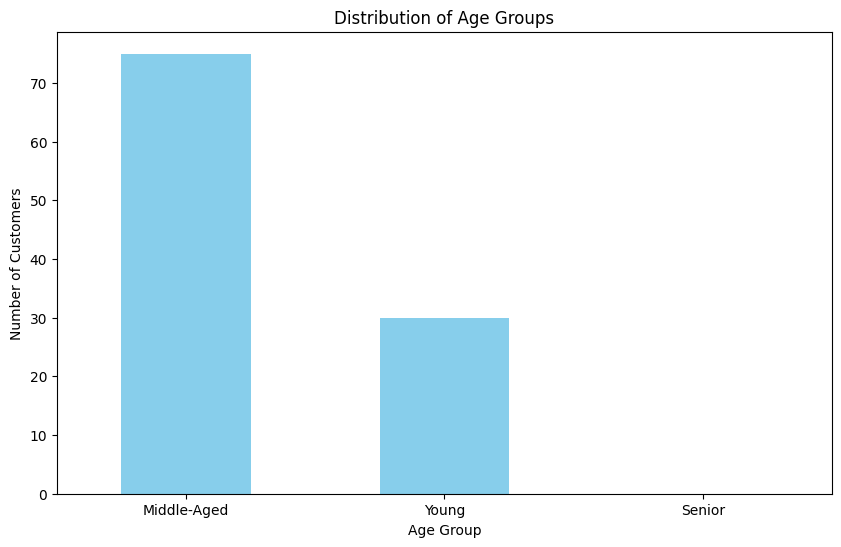

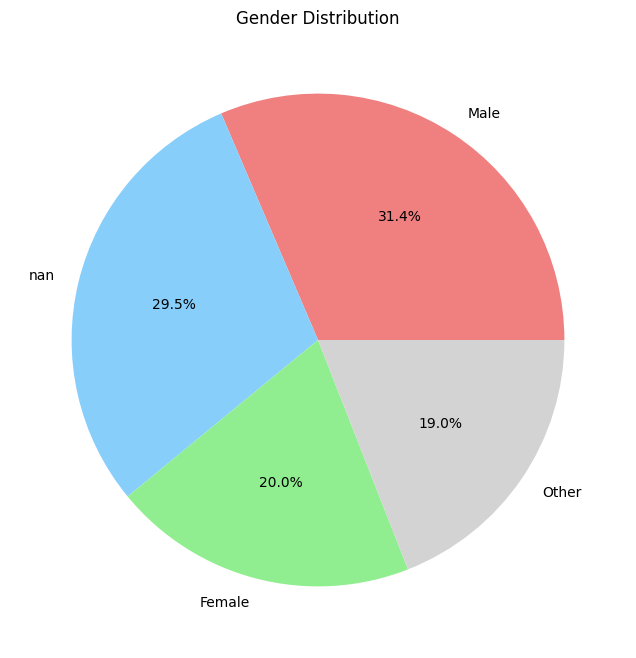

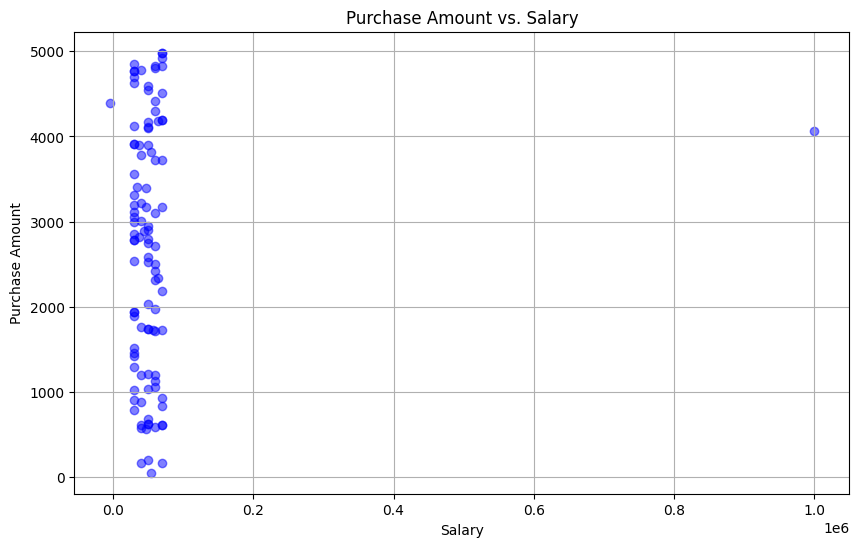

In [ ]:
# Distribution of Age Groups
plt.figure(figsize=(10, 6))
age_group_counts = data['Age Group'].value_counts()
age_group_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.show()

# Gender Distribution
plt.figure(figsize=(8, 8))
gender_counts = data['Gender'].value_counts()
gender_counts.plot(kind='pie', autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue', 'lightgreen', 'lightgray'])
plt.title('Gender Distribution')
plt.ylabel('')
plt.show()

# Purchase Amount vs. Salary
plt.figure(figsize=(10, 6))
plt.scatter(data['Salary'], data['Purchase_Amount'], alpha=0.5, c='blue')
plt.title('Purchase Amount vs. Salary')
plt.xlabel('Salary')
plt.ylabel('Purchase Amount')
plt.grid(True)
plt.show()